# Assignment 1

First we need to import a few modules, execute the cell below:

In [24]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [43]:
def f(x):
    #print (np.cos(x))
    return numpy.cos(x) 

You can use the following cell to check that your code works for scalar arguments:

In [44]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [45]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [46]:
def df_analytic(x):
    #print(-numpy.sin(x))
    return -numpy.sin(x)

In [47]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [48]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [49]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    backward_diff = ((f(x))-(f(x-dx)))/dx
    #print (backward_diff)
    return backward_diff
    
    
    # YOUR CODE HERE

In [50]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0,0.5,'Analytic minus numeric derivative')

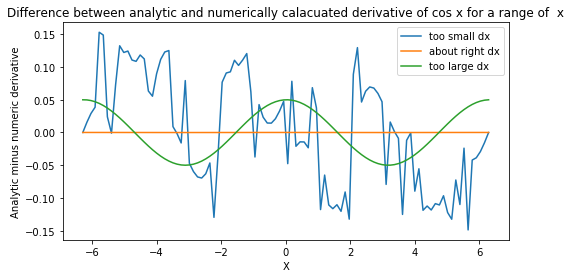

In [56]:
xs = np.linspace(-2*np.pi,2*np.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-15)
df_dx_2 = backward_difference(f, xs, dx=1e-4)
df_dx_3 = backward_difference(f, xs, dx=1e-1)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label="too small dx")
plt.plot(xs, df_dx_2 - df_dx_analytical, label="about right dx")
plt.plot(xs, df_dx_3 - df_dx_analytical, label="too large dx")
plt.legend(loc='upper right')
plt.title('Difference between analytic and numerically calacuated derivative of cos x for a range of  x')
plt.xlabel('X')
plt.ylabel('Analytic minus numeric derivative')

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too small, due to computer limitations of storage with floating point numbers, numerical errors from rounding will arise as there is a finite number of decimal places.

When dx is too large, the range is too large for the function and over/underetimates it leading to inaccuracy (approximation errors). These approximations are the difference of the tangent at each point (which may become a chord) and the analytic derivative